<a href="https://colab.research.google.com/github/IgorEisenlohr/MVP-sprint-2/blob/main/MVP_sprint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/IgorEisenlohr/MVP-sprint-2/main/usa_real_state/realtor-data.csv'
df = pd.read_csv(url, parse_dates=['sold_date'])
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaT
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaT
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaT
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaT
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaT


In [ ]:
df.shape

(512159, 12)

In [ ]:
df.isnull().sum()

status               0
price                0
bed              98937
bath             95218
acre_lot        104979
full_address         0
street             616
city                59
state                0
zip_code           197
house_size      116466
sold_date       309652
dtype: int64

# Deep Learning

In [1]:
!git clone https://github.com/IgorEisenlohr/MVP-sprint-2.git

Cloning into 'MVP-sprint-2'...
remote: Enumerating objects: 5865, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 5865 (delta 5), reused 0 (delta 0), pack-reused 5843
Receiving objects: 100% (5865/5865), 1.14 GiB | 26.60 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (5859/5859), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

from sklearn.metrics import confusion_matrix, classification_report

from keras import metrics
from keras.utils import array_to_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization

In [3]:
main_dir = '/content/MVP-sprint-2/chest_xray'

# train
train_dir = os.path.join(main_dir, 'train')
train_pneumonia = os.path.join(train_dir, 'PNEUMONIA')
train_normal = os.path.join(train_dir, 'NORMAL')

# val
val_dir = os.path.join(main_dir, 'val')
val_pneumonia = os.path.join(val_dir, 'PNEUMONIA')
val_normal = os.path.join(val_dir, 'NORMAL')

# test
test_dir = os.path.join(main_dir, 'test')
test_pneumonia = os.path.join(test_dir, 'PNEUMONIA')
test_normal = os.path.join(test_dir, 'NORMAL')

In [4]:
train_pneumonia_files = os.listdir(train_pneumonia)
print(f'Número de imagens de treino para pneumonia: {len(train_pneumonia_files)}')
train_normal_files = os.listdir(train_normal)
print(f'Número de imagens de treino para casos normais: {len(train_normal_files)}')

Número de imagens de treino para pneumonia: 3875
Número de imagens de treino para casos normais: 1341


In [5]:
val_pneumonia_files = os.listdir(val_pneumonia)
print(f'Número de imagens de validação para pneumonia: {len(val_pneumonia_files)}')
val_normal_files = os.listdir(val_normal)
print(f'Número de imagens de validação para casos normais: {len(val_normal_files)}')

Número de imagens de validação para pneumonia: 8
Número de imagens de validação para casos normais: 8


In [6]:
test_pneumonia_files = os.listdir(test_pneumonia)
print(f'Número de imagens de teste para pneumonia: {len(test_pneumonia_files)}')
test_normal_files = os.listdir(test_normal)
print(f'Número de imagens de teste para casos normais: {len(test_normal_files)}')

Número de imagens de teste para pneumonia: 390
Número de imagens de teste para casos normais: 234


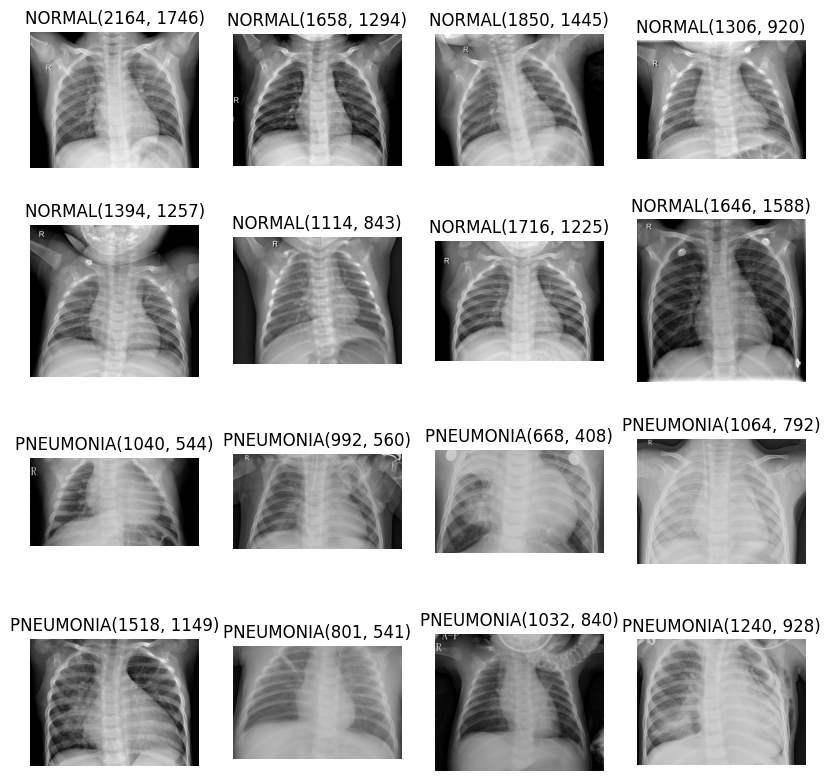

In [7]:
normal_images = [os.path.join(train_normal, filename) for filename in train_normal_files[0:8]]
pneumonia_images = [os.path.join(train_pneumonia, filename) for filename in train_pneumonia_files[0:8]]
images = normal_images+pneumonia_images

plt.figure(figsize=(10,10))
for i, image in enumerate(images, start=1):
  plt.subplot(4,4,i)
  img = Image.open(image)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title(f"{image.split('/')[-2]}{img.size}")

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu' ,input_shape=(250,250,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

In [12]:
train_generator = ImageDataGenerator(rescale= 1./255,
                                     shear_range = 0.2,
                                     zoom_range=0.2,
                                     rotation_range=20,
                                     horizontal_flip=True)

val_generator = ImageDataGenerator(rescale= 1./255)

train_data = train_generator.flow_from_directory(train_dir,
                                                 target_size=(250,250),
                                                 batch_size=32,
                                                 class_mode='binary',
                                                 color_mode='grayscale')

val_data = val_generator.flow_from_directory(val_dir,
                                                 target_size=(250,250),
                                                 batch_size=1,
                                                 class_mode='binary',
                                                 color_mode='grayscale')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


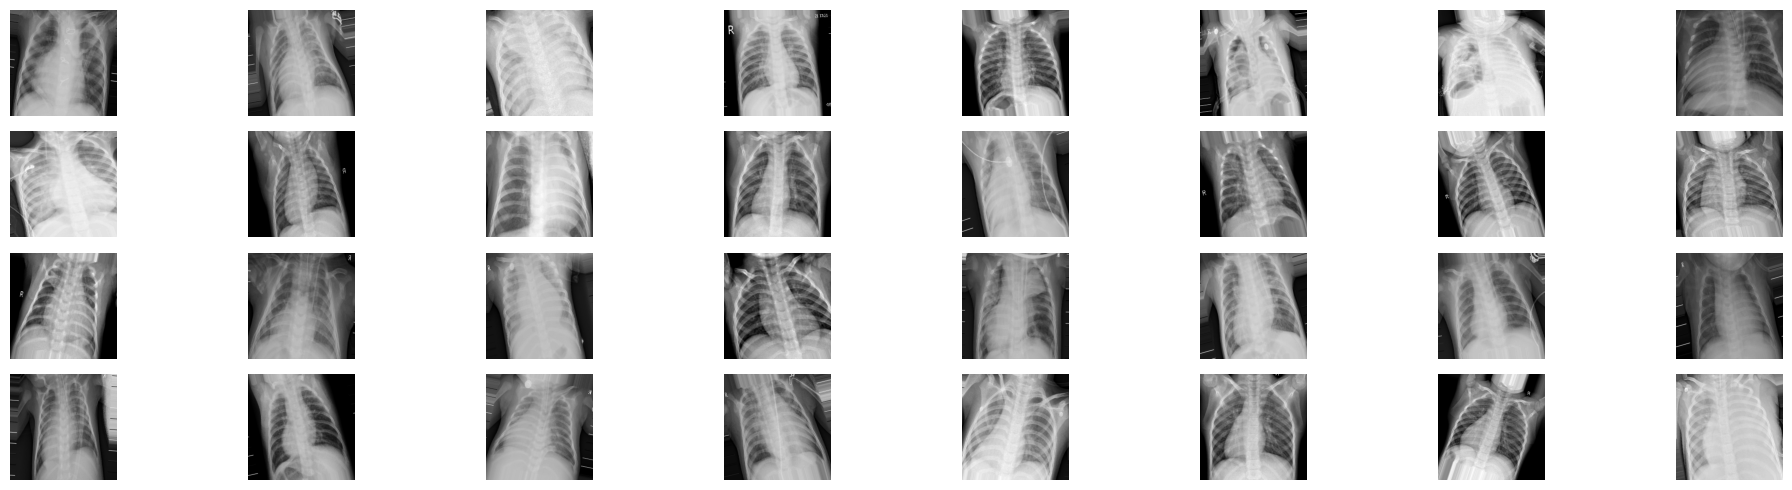

In [13]:
image_batch = train_data[0][0]

plt.figure(figsize=(20,5))
for i in range(len(image_batch)):
  plt.subplot(4,8,i+1)
  img = array_to_img(image_batch[i])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
plt.tight_layout()

In [14]:
history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    epochs=15,
                    validation_data=val_data,
                    validation_steps=len(val_data))

Epoch 1/15
163/163 [==============================] - 111s 601ms/step - loss: 1.6140 - accuracy: 0.8556 - precision: 0.8990 - recall: 0.9076 - val_loss: 59.3408 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/15
163/163 [==============================] - 95s 585ms/step - loss: 0.2326 - accuracy: 0.9174 - precision: 0.9503 - recall: 0.9378 - val_loss: 37.7846 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/15
163/163 [==============================] - 95s 582ms/step - loss: 0.1968 - accuracy: 0.9289 - precision: 0.9563 - recall: 0.9476 - val_loss: 19.6697 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/15
163/163 [==============================] - 94s 577ms/step - loss: 0.1593 - accuracy: 0.9400 - precision: 0.9638 - recall: 0.9551 - val_loss: 12.4333 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/15
163/163 [==============================] - 94s 575ms/step - loss: 0.1653 - a

Found 624 images belonging to 2 classes.
624/624 [==============================] - 9s 14ms/step
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       234
           1       0.89      0.90      0.90       390

    accuracy                           0.87       624
   macro avg       0.86      0.86      0.86       624
weighted avg       0.87      0.87      0.87       624



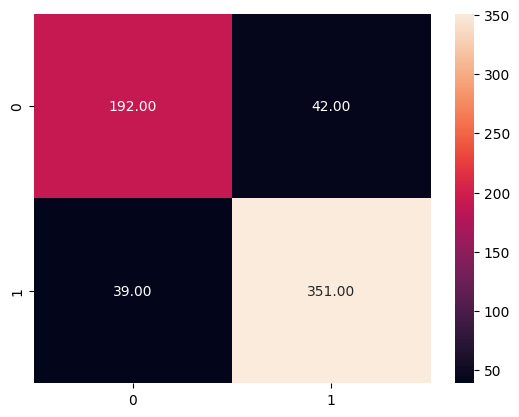

In [15]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_data = test_generator.flow_from_directory(test_dir,
                                               target_size=(250,250),
                                               batch_size=1,
                                               class_mode='binary',
                                               color_mode='grayscale',
                                               shuffle=False)

y_pred = model.predict(test_data)
y_pred[y_pred<=0.5] = 0
y_pred[y_pred>0.5] = 1
cm = confusion_matrix(test_data.classes, y_pred, labels=[0,1])
sns.heatmap(cm, annot=True, fmt='.2f')

print(classification_report(test_data.classes, y_pred))

In [16]:
import pickle
filename = 'cnn_chest_xray.sav'
pickle.dump(model, open(filename, 'wb'))

In [17]:
# open a file, where you stored the pickled data
file = open('cnn_chest_xray.sav', 'rb')

# dump information to that file
load_model = pickle.load(file)

624/624 [==============================] - 9s 14ms/step
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       234
           1       0.89      0.90      0.90       390

    accuracy                           0.87       624
   macro avg       0.86      0.86      0.86       624
weighted avg       0.87      0.87      0.87       624



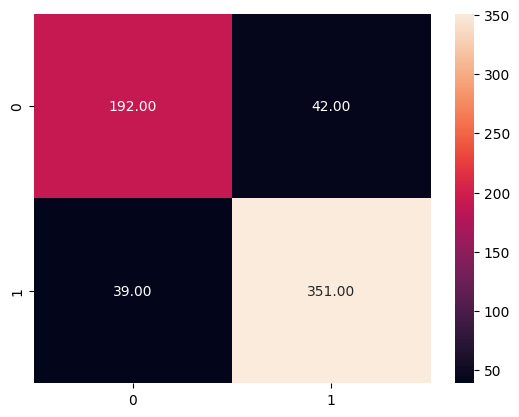

In [18]:
y_pred = load_model.predict(test_data)
y_pred[y_pred<=0.5] = 0
y_pred[y_pred>0.5] = 1
cm = confusion_matrix(test_data.classes, y_pred, labels=[0,1])
sns.heatmap(cm, annot=True, fmt='.2f')

print(classification_report(test_data.classes, y_pred))